In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score


In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.3 (build 10.0.1+10, mixed mode)
  Starting server from C:\Users\N1\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\N1\AppData\Local\Temp\tmpimpptbov
  JVM stdout: C:\Users\N1\AppData\Local\Temp\tmpimpptbov\h2o_N1_started_from_python.out
  JVM stderr: C:\Users\N1\AppData\Local\Temp\tmpimpptbov\h2o_N1_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Helsinki
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_N1_zh5tjr
H2O cluster total nodes:,1
H2O cluster free memory:,1.971 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [58]:
data = h2o.import_file("data2.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [59]:
nan_frame = data.isna().group_by(by = ['isNA(labels)']).count().get_frame()
nan_frame

isNA(labels),nrow
0,916
1,84


In [60]:
data = data.na_omit()
data.group_by(by = "category").count().get_frame()

category,nrow
automotive,91
beauty,91
digital_electronics,88
kids,91
man,90
military,91
perfumes,94
shoes,96
sport,93
woman,91


In [61]:
data.head(3)

C1,path,labels,category
0,https://www.synopsys.com/content/dam/synopsys/verification/Veification_SaberAutomotive_spotlight.jpg.imgw.560.336.jpg,Land vehicle Vehicle Car Sports car Automotive design Coup? Performance car Supercar Luxury vehicle Aston martin dbs v12,automotive
1,https://cdn.rohde-schwarz.com/pws/solution/automotive_1/webinarcenter/automotive_webinars_teaser.jpg,Land vehicle Automotive design Mid-size car Vehicle Car Personal luxury car Concept car Full-size car Executive car Family car,automotive
2,https://blokt.com/wp-content/uploads/2018/08/shutterstock_747021289.jpg,Land vehicle Vehicle Car Personal luxury car Luxury vehicle Automotive design Performance car Bmw Sports car Rim,automotive


In [62]:
def preprocessor(line):
    return line.lower()

vectorizer = CountVectorizer(preprocessor = preprocessor, stop_words = "english")
vectorized = vectorizer.fit_transform(data.as_data_frame()["labels"]).todense()

data_labels = h2o.H2OFrame.from_python(pd.DataFrame(data=vectorized, columns=sorted(vectorizer.vocabulary_)))

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [63]:
data = data.drop(["labels"])
data = data_labels.cbind(data)
paths = data["path"]
data = data.drop(["path", "C1"])

In [64]:
data.shape

(916, 862)

In [65]:
data.head(3)

3d,47,abdomen,accessory,acrobatic,action,active,adaptation,adventure,advertising,aerospace,afro,aftershave,air,aircraft,airman,airplane,album,alcoholic,alloy,alpine,amber,american,amusement,animal,animated,animation,ankle,appliance,aqua,archery,architecture,area,arena,arm,army,arrow,art,artificial,artist,arts,artwork,asphalt,assembly,aston,athlete,athletic,athletics,atlas,atmosphere,atmospheric,audi,audience,audio,auto,automobile,automotive,autumn,aviation,axle,azure,baby,backlighting,backyard,badminton,ball,ballet,balloon,bandy,banner,barbell,barechested,barware,basic,basketball,bat,beaker,beanie,beard,bearing,beater,beauty,beige,beverage,biathlon,bicycle,bike,biking,binding,birthday,black,blackboard,blazer,blended,blond,blue,bmw,bmx,boardsport,boat,boeing,book,boot,botany,bottle,bow,bowl,box,brand,brass,breaststroke,breed,bridal,bridle,brown,brushing,building,bumper,business,businessperson,butterfly,button,cable,cables,calendar,calf,calligraphy,camera,camouflage,canadian,canidae,car,care,carmine,carnivore,cartoon,ceiling,celebrating,center,cg,ch,champions,championship,character,cheek,cheering,chest,child,chin,chinook,cinematographer,circle,circuit,citro,citrus,city,cityscape,clap,class,classic,cleat,climbing,clip,clock,close,clothing,cloud,clutch,coach,cobalt,cocktail,collar,college,collision,colorfulness,coloring,combat,commercial,commissioned,communication,communications,community,compact,companion,competition,component,compositing,computer,concept,confetti,congestion,console,convertible,cook,cool,cosmetics,costume,cotton,country,coup
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Train first model

In [66]:
# split data

splits = data.split_frame([0.9], seed = 1)
train = splits[0]
test = splits[1]

predictors = data.col_names[:-1]
response = "category"

In [67]:
gbm_model = H2ORandomForestEstimator(distribution="multinomial")

In [68]:
gbm_model.train(predictors, response, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [69]:
gbm_model.summary().as_data_frame()

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,500.0,224178.0,1.0,20.0,17.036,2.0,66.0,30.024


In [70]:
# confusion_matrix for test/train data
gbm_model.confusion_matrix(test).as_data_frame()

,automotive,beauty,digital_electronics,kids,man,military,perfumes,shoes,sport,woman,Error,Rate
0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 8
1,0.0,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.200000,2 / 10
2,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 12
3,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.285714,2 / 7
4,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 7
5,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.000000,0 / 7
6,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.000000,0 / 4
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.000000,0 / 18
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.125000,1 / 8
9,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.500000,4 / 8


In [71]:
# error for train data

print("R2 error: {}".format(gbm_model.r2()))
print("MSE error: {}".format(gbm_model.mse()))
print("1 - MSE error: {}".format(1- gbm_model.mse()))

R2 error: 0.9856332739746693
MSE error: 0.1179525202768468
1 - MSE error: 0.8820474797231532


In [72]:
# error for test data

test_model = gbm_model.model_performance(test)
print("R2 error: {}".format(test_model.r2()))
print("MSE error: {}".format(test_model.mse()))
print("1 - MSE error: {}".format(1 - test_model.mse()))

R2 error: 0.9852740199235235
MSE error: 0.12576853328792315
1 - MSE error: 0.8742314667120769


In [73]:
# accuracy score 

predictions = gbm_model.predict(test)["predict"][:,0].as_data_frame()
real = test["category"][:,0].as_data_frame()
print("accuracy_score: {}".format(accuracy_score(real, predictions)))

drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.898876404494382


In [74]:
#features importance

var_data = gbm_model.varimp(use_pandas = True)
print(var_data)

         variable  relative_importance  scaled_importance  percentage
0         perfume           631.627747           1.000000    0.028990
1           child           532.349976           0.842822    0.024434
2             car           495.080292           0.783817    0.022723
3            shoe           485.976715           0.769404    0.022305
4            army           440.931091           0.698087    0.020238
5            text           405.143738           0.641428    0.018595
6             lip           400.372772           0.633875    0.018376
7          sports           398.328766           0.630638    0.018282
8         soldier           366.666168           0.580510    0.016829
9            font           346.701752           0.548902    0.015913
10       footwear           334.489624           0.529568    0.015352
11         liquid           329.114746           0.521058    0.015106
12       sneakers           317.648346           0.502904    0.014579
13         bottle   

## Do some feature engineering and selection here

In [85]:
# delete not important features with Kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

gbm_model = H2ORandomForestEstimator(distribution="multinomial")

X = data[data.col_names[:-1]].as_data_frame()  
y = data["category"].as_data_frame()    

acc = []
acc_score = 0

for k in range(10,200,10):
    selection = SelectKBest(score_func=chi2, k=k)
    new_X = selection.fit(X,y).transform(X)
    
    new_data = h2o.H2OFrame.from_python(new_X).cbind(h2o.H2OFrame(y))
    splits = new_data.split_frame([0.9])
    
    Ktrain = splits[0]
    Ktest = splits[1]

    Kpredictors = new_data.col_names[:-1]
    Kresponse = "category"
    
    gbm_model.train(Kpredictors, Kresponse, training_frame=Ktrain)

    predictions = gbm_model.predict(Ktest)["predict"][:,0].as_data_frame()
    real = Ktest["category"][:,0].as_data_frame()
    acc.append(accuracy_score(real, predictions))
    if (accuracy_score(real, predictions) > acc_score):
        new_new_data = new_data
    print("accuracy_score: {}".format(accuracy_score(real, predictions)))

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.5955056179775281
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.6931818181818182
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |█████████████

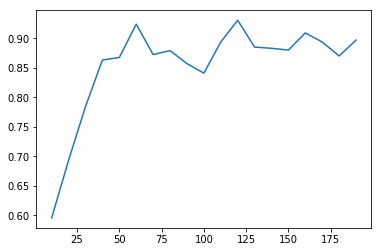

In [86]:
plt.plot(list(range(10,200,10)), acc)
plt.show()

In [87]:
data = new_new_data
bestK = acc.index(max(acc))*10
print("Leave only {} labels".format(bestK))

Leave only 110 labels


## Tune parameters of the model

In [93]:
# split data

splits = data.split_frame([0.9], seed = 123)
train = splits[0]
test = splits[1]

predictors = data.col_names[:-1]
response = "category"

In [89]:
from h2o.grid.grid_search import H2OGridSearch

params = {'max_depth' : list(range(1,30,2))}
gbm_grid = H2OGradientBoostingEstimator(ntrees = 1000, learn_rate=0.05, seed = 123)
grid = H2OGridSearch(gbm_grid, params,
                         grid_id = 'depth_grid')
grid.train(x = predictors, y = response, training_frame = train, validation_frame = test)

gbm Grid Build progress: |█ (cancelled)


H2OJobCancelled: Job<$03017f00000132d4ffffffff$_b05a1f5aecb73acab4c0d3d6093f4a50> was cancelled by the user.

In [ ]:
grid.get_grid(sort_by = 'mse')

In [94]:
gbm_model = H2ORandomForestEstimator(distribution="multinomial")#, ntrees = 1000, learn_rate = 0.05, max_depth = 21)
gbm_model.train(x = predictors, y = response, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [95]:
# error for test data

test_model = gbm_model.model_performance(test)
print("R2 error: {}".format(test_model.r2()))
print("MSE error: {}".format(test_model.mse()))
print("1 - MSE error: {}".format(1 - test_model.mse()))

# accuracy score 

predictions = gbm_model.predict(test)["predict"][:,0].as_data_frame() #0.8488372093023255
real = test["category"][:,0].as_data_frame()
print("accuracy_score: {}".format(accuracy_score(real, predictions)))  

R2 error: 0.9784511902944037
MSE error: 0.16722762058712845
1 - MSE error: 0.8327723794128715
drf prediction progress: |████████████████████████████████████████████████| 100%
accuracy_score: 0.8372093023255814


In [151]:
gbm_model.summary().as_data_frame()

,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,1000.0,10000.0,2470780.0,0.0,21.0,4.8133,1.0,98.0,14.4561


In [344]:
gbm_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1557579225396_81


ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.06095154977396666
RMSE: 0.24688367660492797
LogLoss: 0.19551969028083852
Mean Per-Class Error: 0.06482725036957851
Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



automotive,beauty,digital_electronics,kids,man,military,perfumes,shoes,sport,woman,Error,Rate
80.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0361446,3 / 83
0.0,73.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0987654,8 / 81
1.0,0.0,80.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0243902,2 / 82
0.0,0.0,1.0,79.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0481928,4 / 83
1.0,1.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,1.0,0.0384615,3 / 78
0.0,0.0,0.0,1.0,2.0,80.0,0.0,0.0,0.0,0.0,0.0361446,3 / 83
0.0,0.0,0.0,0.0,0.0,0.0,85.0,1.0,0.0,0.0,0.0116279,1 / 86
0.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0 / 87
0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,81.0,0.0,0.0795455,7 / 88
0.0,9.0,0.0,1.0,11.0,0.0,0.0,0.0,1.0,58.0,0.275,22 / 80


Top-10 Hit Ratios: 


k,hit_ratio
1,0.9362214
2,0.9783394
3,0.9879664
4,0.9927799
5,0.9951866
6,0.9975933
7,0.9987966
8,1.0
9,1.0
10,1.0


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
,2019-05-11 18:10:20,0.000 sec,0.0,0.9000000,2.3025851,0.9290012
,2019-05-11 18:10:20,0.025 sec,1.0,0.8007330,1.6388342,0.1215403
,2019-05-11 18:10:20,0.052 sec,2.0,0.7283501,1.3446656,0.1191336
,2019-05-11 18:10:20,0.081 sec,3.0,0.6657557,1.1455701,0.1191336
,2019-05-11 18:10:20,0.103 sec,4.0,0.6114200,0.9981818,0.1179302
---,---,---,---,---,---,---
,2019-05-11 18:10:22,1.739 sec,46.0,0.2519344,0.2030390,0.0661853
,2019-05-11 18:10:22,1.777 sec,47.0,0.2505136,0.2008982,0.0661853
,2019-05-11 18:10:22,1.822 sec,48.0,0.2494049,0.1992726,0.0661853
,2019-05-11 18:10:22,1.878 sec,49.0,0.2479186,0.1970388,0.0649819



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
shoe,299.7927551,1.0,0.1165542
perfume,294.2826233,0.9816202,0.1144119
military,271.6054993,0.9059775,0.1055955
child,236.0577087,0.7874030,0.0917751
sport,218.8685760,0.7300663,0.0850923
---,---,---,---
athletic,0.0018642,0.0000062,0.0000007
infantry,0.0001167,0.0000004,0.0000000
camouflage,0.0000004,0.0000000,0.0000000
circuit,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [343]:
data.shape

(916, 71)